In [22]:
import pandas as pd

In [23]:
import os

In [24]:
df = pd.read_csv("C:/Users/H/Documents/a/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('C:/Users/H/Documents/a/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/H/Documents/a/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv",index = False)

In [25]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
type(all_data['Order Date'])

pandas.core.series.Series

In [27]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [28]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [29]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [30]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [31]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [32]:

results = all_data.groupby('Month',as_index = False).sum()

ValueError: x and y must have same first dimension, but have shapes (11,) and (12,)

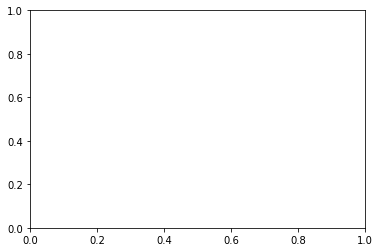

In [153]:
import matplotlib.pyplot as plt

months = range(1,12)
plt.plot(months,results['Sales'],'-')
plt.xticks(months)
plt.ylabel('Sales in Indian Rupee')
plt.xlabel('Month number')
plt.show()

In [ ]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+get_state(x))
all_data.head()

In [ ]:
q = all_data.groupby('City',as_index = False)['Sales'].sum()

In [ ]:
q.tail()

In [ ]:
q.max()

In [34]:
s = results.sort_values('Sales',ascending = False)

In [35]:
s.head()

,Month,Quantity Ordered,Price Each,Sales
11,12,28114,4.588415e+06,4.613443e+06
9,10,22703,3.715555e+06,3.736727e+06
3,4,20558,3.367671e+06,3.390670e+06
10,11,19798,3.180601e+06,3.199603e+06
4,5,18667,3.135125e+06,3.152607e+06


In [36]:
d = all_data.groupby('Product',as_index = False)['Quantity Ordered'].sum()

In [37]:
d = d.sort_values('Quantity Ordered',ascending = False)

In [38]:
d.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


In [39]:
g = all_data.groupby('Product',as_index = False)['Sales'].sum()

In [40]:
g = g.sort_values('Sales',ascending = False)

In [41]:
g.head()

,Product,Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56


In [42]:
import matplotlib.pyplot as plt

In [43]:
from matplotlib import style

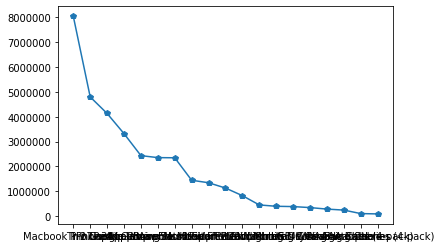

In [56]:
plt.plot(g['Product'],g['Sales'],'p-')

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

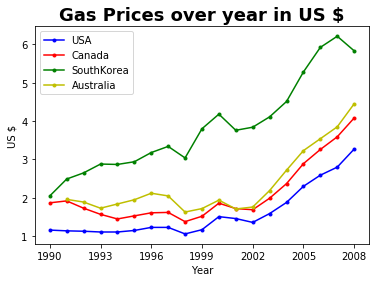

In [5]:
gas = pd.read_csv('C:/Users/H/Documents/gas_prices.csv')

plt.title('Gas Prices over year in US $', fontdict = {'fontweight': 'bold','fontsize' : 18})

plt.plot(gas.Year, gas.USA, 'b.-',label = 'USA')
plt.plot(gas.Year, gas.Canada,'r.-',label = 'Canada')
plt.plot(gas['Year'],gas['South Korea'],'g.-' ,label = 'SouthKorea')
plt.plot(gas.Year, gas.Australia,'y.-',label = 'Australia')

#for country in gas:
 #  if country != 'Year':
  #      plt.plot(gas.Year,gas[country],marker = '.')
   



plt.xticks(gas.Year[::3])

plt.xlabel('Year')

plt.ylabel('US $')

plt.legend()

plt.savefig('Gas_price_figure.png',dpi = 300)
#legend is used to denote labels
plt.show()

In [165]:
fifa = pd.read_csv('C:/Users/H/Documents/fifa_data.csv')

In [166]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


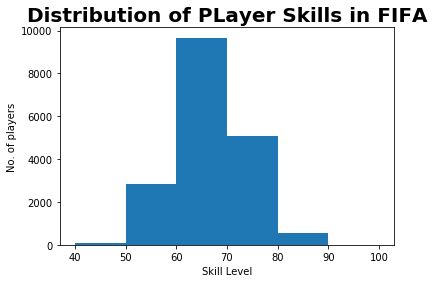

In [167]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins = bins)

plt.ylabel('No. of players')
plt.xlabel('Skill Level')
plt.title('Distribution of PLayer Skills in FIFA',fontdict = {'fontsize' : 20 , 'fontweight' : 'bold'})

plt.show()

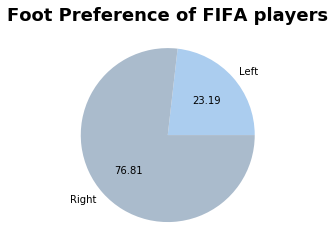

In [168]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left','Right']

colours = ['#abcdef','#aabbcc']
plt.pie([left,right],labels = labels,colors = colours, autopct = '%.2f')

plt.title('Foot Preference of FIFA players',fontdict = {'fontsize' : 18,'fontweight' : 'bold'})

plt.show()

In [169]:
fifa.Weight = [int(x.strip('lbs'))  if type(x) == str else x for x in fifa.Weight]

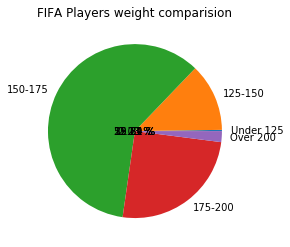

In [170]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >=125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >=150) & (fifa.Weight < 175)].count()[0]
medium_heavy= fifa.loc[(fifa.Weight >=175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >=200)].count()[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']

plt.pie(weights,labels = labels ,autopct = '%.2f %%',pctdistance = 0.0)

plt.title('FIFA Players weight comparision')

plt.show()

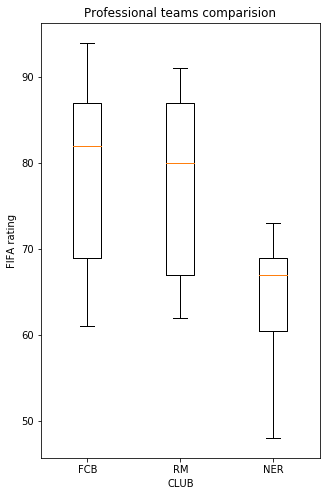

In [178]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
labels = ['FCB','RM','NER']
plt.figure(figsize=(5,8))
plt.boxplot([barcelona,madrid,revs],labels = labels)


plt.title("Professional teams comparision")

plt.xlabel('CLUB')

plt.ylabel('FIFA rating')



plt.show()

In [1]:
import curses

ModuleNotFoundError: No module named '_curses'

In [2]:
pip install curses

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement curses (from versions: none)
ERROR: No matching distribution found for curses
